## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os as os
import datetime as datetime
import math as math

## Import data

In [2]:
df = pd.read_csv(os.path.join('data','bitstampUSD_data.csv'), usecols=('Timestamp', 'Weighted_Price'))

In [3]:
df.head()

,Timestamp,Weighted_Price
0,1325317920,4.39
1,1325317980,NaN
2,1325318040,NaN
3,1325318100,NaN
4,1325318160,NaN


## Data wrangling

In [4]:
num_of_samples = 10000000
q_verbose = num_of_samples/25

# init
naninds = list()
nantimes = list()
nanhtimes = list()
nonnaninds = list()
nonnantimes = list()
nonnanhtimes = list()
nonnanprices = list()
dig1 = list()
dig12 = list()
dig2 = list()

subsample = np.linspace(1, len(df), num_of_samples)
numsample = len(subsample)

for x in range(numsample):
    i = int(math.floor(subsample[x])-1)
    
    if q_verbose > 0:
        if x % q_verbose == 0:
            print('sample # ' + str(x) + ' of ' + str(numsample))
            
    this_Timestamp = df['Timestamp'][i]
    this_hTimestamp = datetime.datetime.fromtimestamp(this_Timestamp)
    this_price = df['Weighted_Price'][i]
    is_nan = np.isnan(this_price)
    
    if is_nan:
        naninds.append(i)
        nantimes.append(this_Timestamp)
        nanhtimes.append(this_hTimestamp)
    else:
        nonnaninds.append(i)
        nonnantimes.append(this_Timestamp)
        nonnanhtimes.append(this_hTimestamp)        
        dig1.append(int(str(this_price*100)[0:1]))
        dig12.append(int(str(this_price*100)[0:2]))
        dig2.append(int(str(this_price*100)[1:2]))
        nonnanprices.append(this_price)


dfnan = pd.DataFrame()
dfnan['inds'] = naninds
dfnan['times'] = nantimes
dfnan['htimes'] = nanhtimes

dfx = pd.DataFrame()
dfx['inds'] = nonnaninds
dfx['times'] = nonnantimes
dfx['htimes'] = nonnanhtimes
dfx['prices'] = nonnanprices
dfx['dig1'] = dig1
dfx['dig2'] = dig2
dfx['dig12'] = dig12

sample # 0 of 10000000
sample # 400000 of 10000000
sample # 800000 of 10000000
sample # 1200000 of 10000000
sample # 1600000 of 10000000
sample # 2000000 of 10000000
sample # 2400000 of 10000000
sample # 2800000 of 10000000
sample # 3200000 of 10000000
sample # 3600000 of 10000000
sample # 4000000 of 10000000
sample # 4400000 of 10000000
sample # 4800000 of 10000000
sample # 5200000 of 10000000
sample # 5600000 of 10000000
sample # 6000000 of 10000000
sample # 6400000 of 10000000
sample # 6800000 of 10000000
sample # 7200000 of 10000000
sample # 7600000 of 10000000
sample # 8000000 of 10000000
sample # 8400000 of 10000000
sample # 8800000 of 10000000
sample # 9200000 of 10000000
sample # 9600000 of 10000000


In [12]:
print(len(dfnan))
dfnan.head()

2630011


,inds,times,htimes
0,1,1325317980,2011-12-31 00:53:00
1,1,1325317980,2011-12-31 00:53:00
2,2,1325318040,2011-12-31 00:54:00
3,2,1325318040,2011-12-31 00:54:00
4,3,1325318100,2011-12-31 00:55:00


In [13]:
print(len(dfx))
dfx.head()

7369989


,inds,times,htimes,prices,dig1,dig2,dig12
0,0,1325317920,2011-12-31 00:52:00,4.39,4,3,43
1,0,1325317920,2011-12-31 00:52:00,4.39,4,3,43
2,0,1325317920,2011-12-31 00:52:00,4.39,4,3,43
3,478,1325346600,2011-12-31 08:50:00,4.39,4,3,43
4,478,1325346600,2011-12-31 08:50:00,4.39,4,3,43


## Where are the NaNs? 

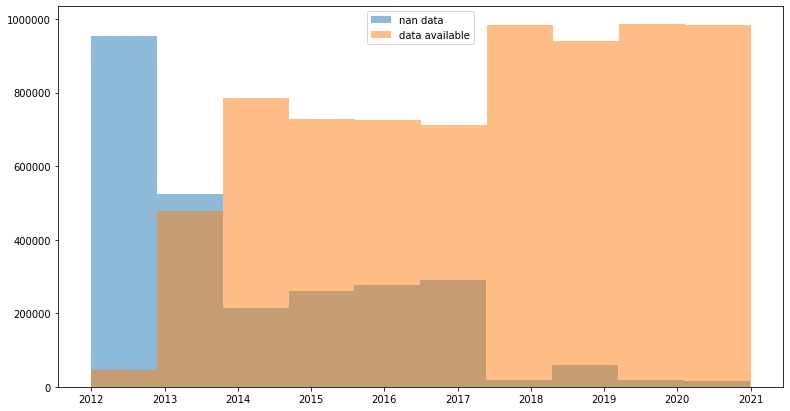

In [14]:
f = plt.figure(figsize=(13,7), facecolor='w')
tr_nan = plt.hist(dfnan['htimes'], alpha=0.5)
tr_nonnan = plt.hist(dfx['htimes'], alpha=0.5)
plt.legend(('nan data', 'data available'));

Unexpectedly lots of NaNs thorugh 2017. I'm going to make a (possibly unsound) assumption that the availability of data is statistically independent of the first digits (and vice versa)

## Glance at the trace

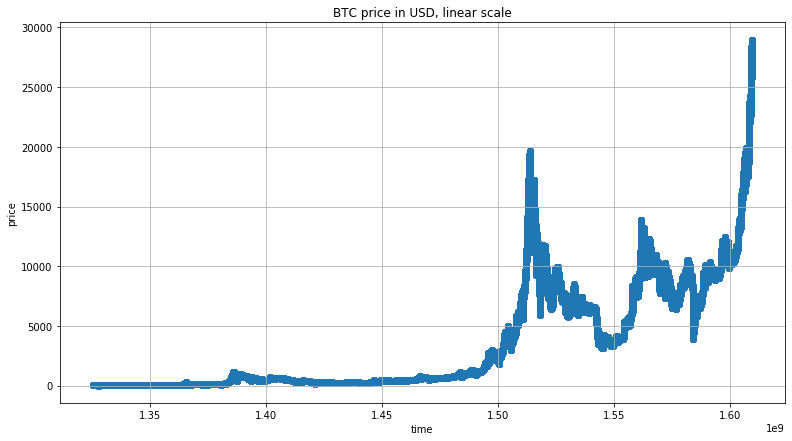

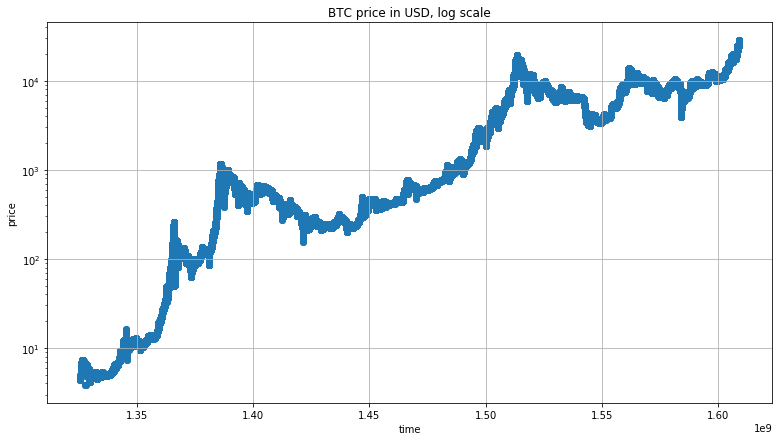

In [26]:
f = plt.figure(figsize=(13,7), facecolor='w')
plt.scatter(dfx['times'], dfx['prices'])
plt.xlabel('time')
plt.ylabel('price')
plt.title('')
plt.grid('on')
plt.yscale('linear')
plt.title('BTC price in USD, linear scale')

f = plt.figure(figsize=(13,7), facecolor='w')
plt.scatter(dfx['times'], dfx['prices'])
plt.xlabel('time')
plt.ylabel('price')
plt.title('')
plt.grid('on')
plt.yscale('log')
plt.title('BTC price in USD, log scale');

## What is the digit distribution?
Suppose bitcoin's price was a random, then over multiple orders of magnitude the distribution of each digit should be uniform. In other words, the price is just as likely to be something that starts with a "7" as 

### Leading digit

In [15]:
bins = range(1,11)

digs = list()
counts1 = list()
counts2 = list()

for bi in range(1,len(bins)):
    digs.append(bi)
    count1 = len(dfx[dfx['dig1']==bi])
    counts1.append(count1)
    count2 = len(dfx[dfx['dig2']==bi])
    counts2.append(count2)
    print('Leading digit: "' + str(bi) + '" has ' + str(count1) + ' instances ... (and ' + str(count2) + ' appearances as 2nd digit)')

Leading digit: "1" has 1575951 instances ... (and 993399 appearances as 2nd digit)
Leading digit: "2" has 921218 instances ... (and 922777 appearances as 2nd digit)
Leading digit: "3" has 797112 instances ... (and 872090 appearances as 2nd digit)
Leading digit: "4" has 744554 instances ... (and 662402 appearances as 2nd digit)
Leading digit: "5" has 482145 instances ... (and 675566 appearances as 2nd digit)
Leading digit: "6" has 896794 instances ... (and 575298 appearances as 2nd digit)
Leading digit: "7" has 650191 instances ... (and 664828 appearances as 2nd digit)
Leading digit: "8" has 624733 instances ... (and 566065 appearances as 2nd digit)
Leading digit: "9" has 677291 instances ... (and 506646 appearances as 2nd digit)


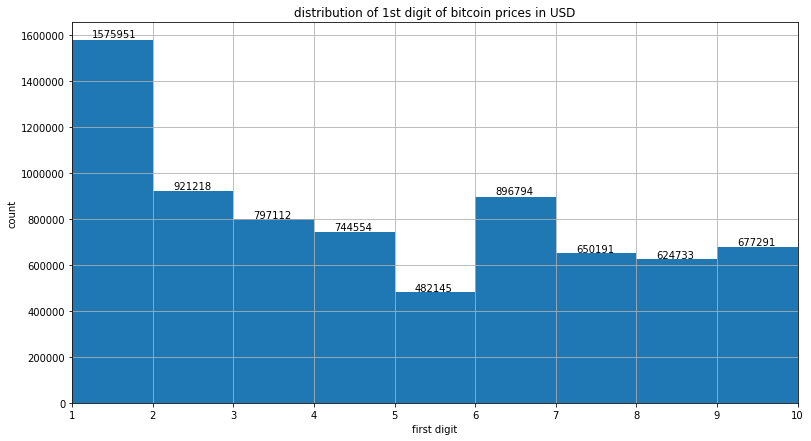

In [17]:
f = plt.figure(figsize=(13,7), facecolor='w')
tr_nan = plt.hist(dfx['dig1'], bins = bins)
plt.xlabel('first digit')
plt.ylabel('count')
plt.title('distribution of 1st digit of bitcoin prices in USD')
plt.grid('on')
plt.xlim((1,10));

for x in range(len(digs)):
    plt.text(digs[x]+0.25, counts1[x]*1.01, str(counts1[x]))

The above plot shows us that, for example, there were nearly 1600000 instances that the price started with a '1', and only about 650000 instances where the price started with a '7'

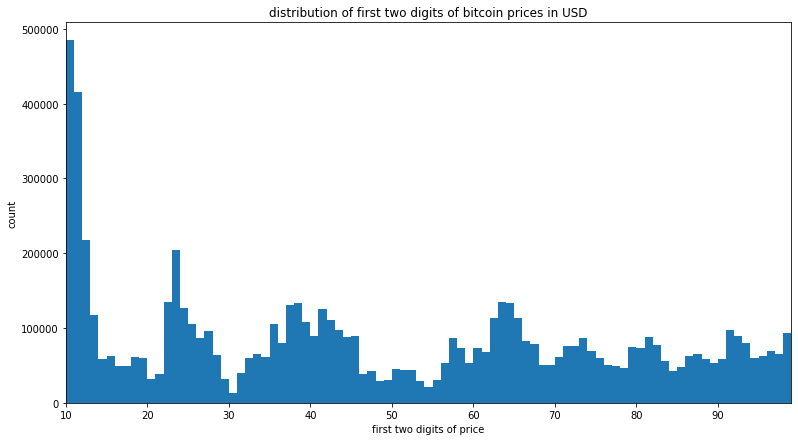

In [18]:
f = plt.figure(figsize=(13,7), facecolor='w')
bins = range(1,100)
tr_nan = plt.hist(dfx['dig12'], bins = bins)
plt.xlabel('first two digits of price')
plt.ylabel('count')
plt.title('distribution of first two digits of bitcoin prices in USD')
plt.xlim(10,99);

The above plot shows that the price has a propensity to hover between starting with '10...' and '15...'. Notice that there is also some waviness towards the right... What is that? Below, let's look at the distribution of the second digit:

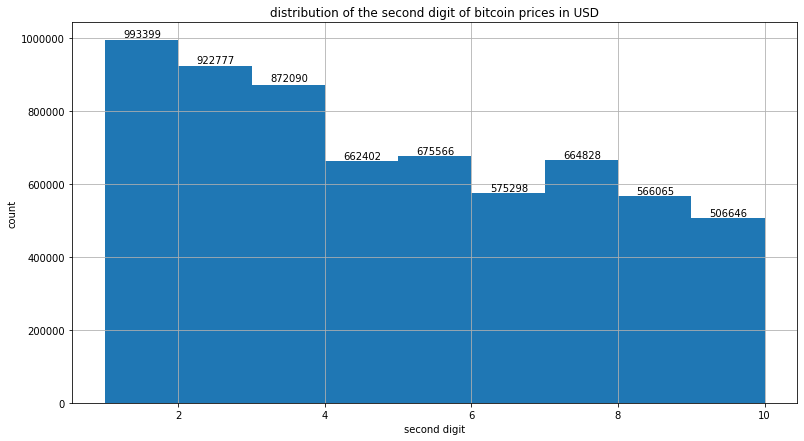

In [21]:
f = plt.figure(figsize=(13,7), facecolor='w')
bins = range(1,11)
tr_nan = plt.hist(dfx['dig2'], bins = bins)
plt.xlabel('second digit')
plt.ylabel('count')
plt.title('distribution of the second digit of bitcoin prices in USD');
plt.grid('on')

for x in range(len(digs)):
    plt.text(digs[x]+0.25, counts2[x]*1.01, str(counts2[x]))
    

## Time dependence